In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
data = pd.read_csv('rice_beef_coffee_price_changes.csv')
data.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               360 non-null    int64  
 1   Month              360 non-null    object 
 2   Price_beef_kilo    360 non-null    float64
 3   Price_rice_kilo    360 non-null    float64
 4   Price_coffee_kilo  360 non-null    float64
 5   Inflation_rate     347 non-null    float64
 6   Price_rice_infl    347 non-null    float64
 7   Price_beef_infl    347 non-null    float64
 8   Price_coffee_infl  347 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 25.4+ KB


In [74]:
data.describe()

,Year,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
count,360.000000,360.000000,360.000000,360.000000,347.000000,347.000000,347.000000,347.000000
mean,2006.583333,3.152056,0.364083,2.999722,36.320029,0.476167,4.044006,3.953660
std,8.671906,1.167673,0.131201,1.164001,27.062804,0.135525,0.900393,1.460999
min,1992.000000,1.630000,0.160000,1.170000,-1.290000,0.240000,2.680000,1.770000
25%,1999.000000,2.117500,0.260000,2.265000,12.370000,0.390000,3.185000,3.065000
50%,2007.000000,2.730000,0.345000,2.940000,28.300000,0.460000,4.090000,3.680000
75%,2014.000000,4.220000,0.440000,3.605000,59.700000,0.550000,4.735000,4.565000
max,2022.000000,6.170000,0.910000,6.620000,89.590000,1.120000,6.930000,9.760000


In [75]:
data.isna().sum()

Year                  0
Month                 0
Price_beef_kilo       0
Price_rice_kilo       0
Price_coffee_kilo     0
Inflation_rate       13
Price_rice_infl      13
Price_beef_infl      13
Price_coffee_infl    13
dtype: int64

In [76]:
data['Month'].unique()

array(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Jan'], dtype=object)

### Changing data type to categorical and encoding ordinal data

In [77]:
data['Month'].replace({
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
},inplace=True)

data['Month'] = data['Month'].astype('category')

### Removing null data

In [78]:
data.dropna(axis=0,inplace=True)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 358
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               347 non-null    int64   
 1   Month              347 non-null    category
 2   Price_beef_kilo    347 non-null    float64 
 3   Price_rice_kilo    347 non-null    float64 
 4   Price_coffee_kilo  347 non-null    float64 
 5   Inflation_rate     347 non-null    float64 
 6   Price_rice_infl    347 non-null    float64 
 7   Price_beef_infl    347 non-null    float64 
 8   Price_coffee_infl  347 non-null    float64 
dtypes: category(1), float64(7), int64(1)
memory usage: 25.1 KB


### Scaling numerical data

In [80]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = data.drop(columns=['Year','Month'])
x_scaled = scale.fit_transform(x)
x_scaled

array([[-0.54613893, -0.64676398, -1.28083093, ...,  0.39779038,
         0.81859465, -0.74965071],
       [-0.60575209, -0.64676398, -1.24662221, ...,  0.39779038,
         0.66288249, -0.6948146 ],
       [-0.66536524, -0.64676398, -1.33214402, ...,  0.39779038,
         0.51829263, -0.82505036],
       ...,
       [ 2.1620014 ,  0.25606043,  1.96899813, ..., -0.63672015,
         1.76398989,  0.88172356],
       [ 2.37490551,  0.25606043,  2.31108541, ..., -0.63672015,
         2.03092502,  1.15590411],
       [ 2.37490551,  0.25606043,  2.48212904, ..., -0.63672015,
         2.03092502,  1.28613987]])

<Axes: >

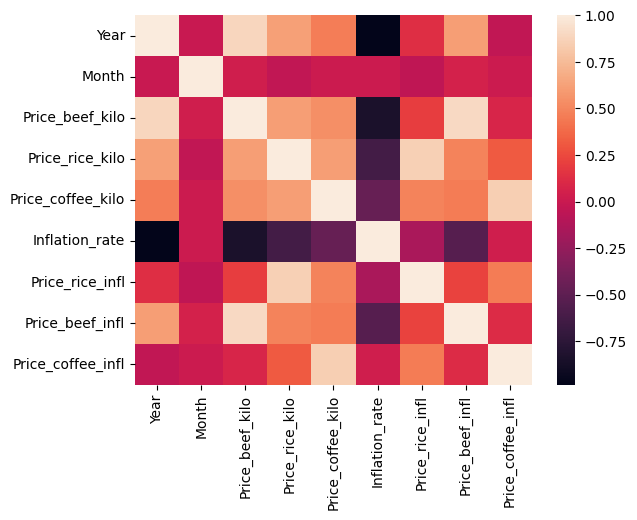

In [81]:
sns.heatmap(data.corr())

c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

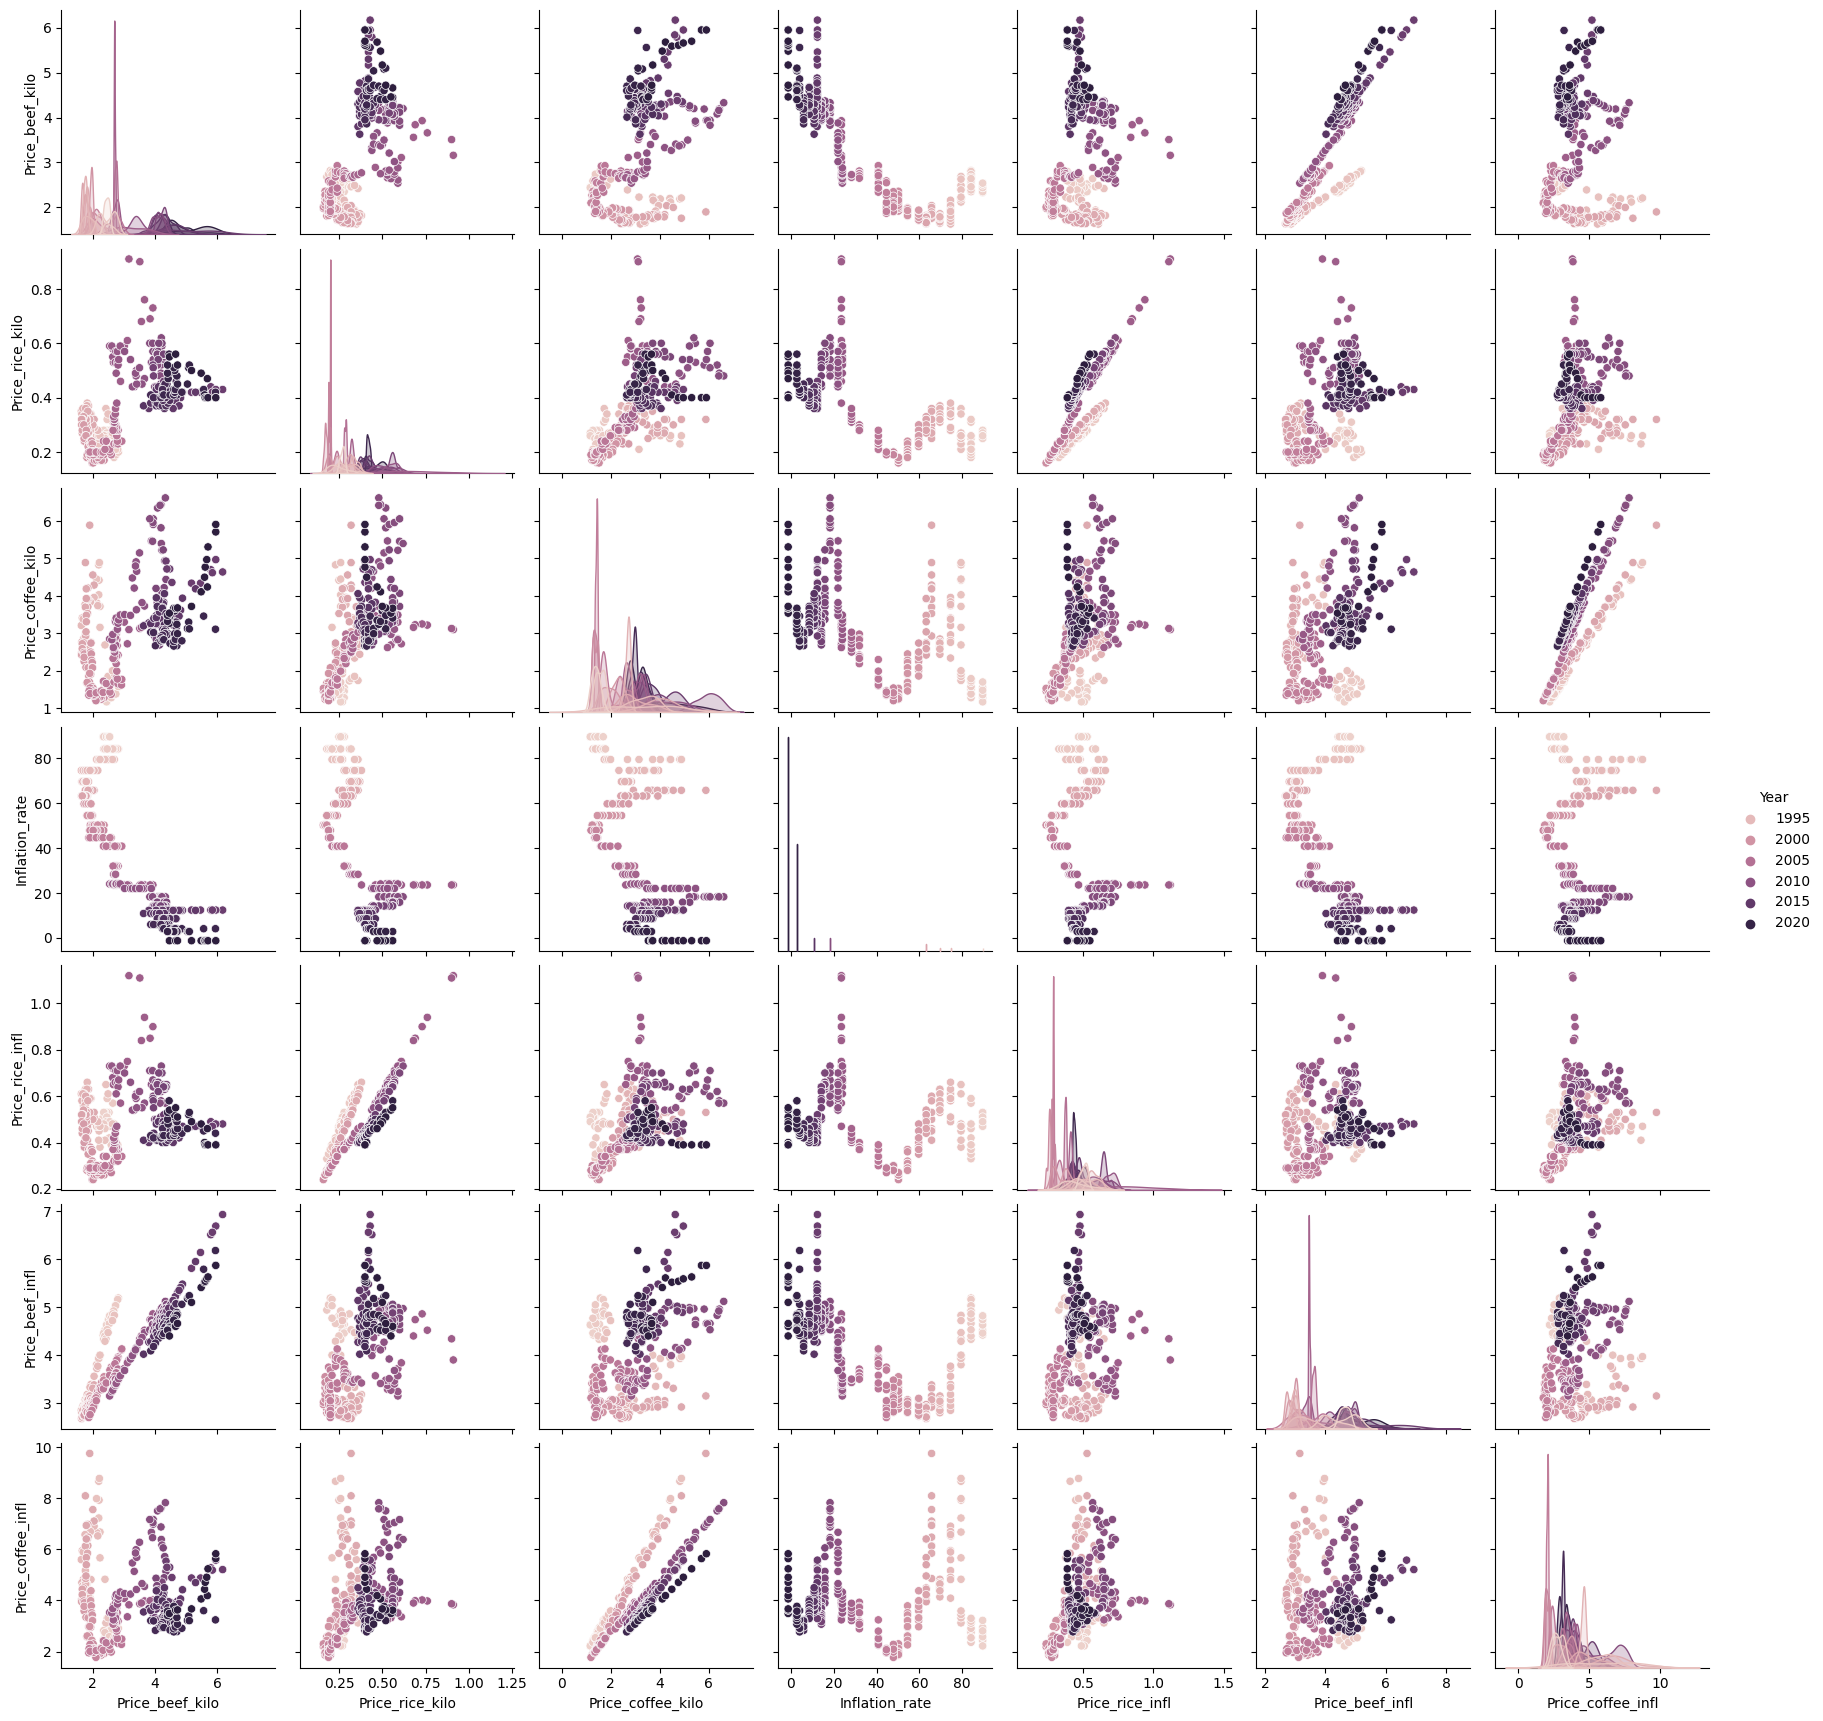

In [82]:
sns.pairplot(data=data, hue='Year')